# **Shopping Trends Analysics**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("/content/shopping_trends_updated.csv")

In [3]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
print("The Number of Rows present in the dataset : ", data.shape[0]-1)
print("The Number of Columns present in the dataset:", data.shape[1])

The Number of Rows present in the dataset :  3899
The Number of Columns present in the dataset: 18


In [6]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
data.describe(include = 'object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


In [8]:
data.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [10]:
print("Number of null values in each columns:")
data.isnull().sum()

Number of null values in each columns:


,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [11]:
columns = ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category'
       , 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases']

categorical_columns = ['Age', 'Gender', 'Item Purchased', 'Category','Location', 'Size',  'Season',  'Payment Method']

In [12]:
for column in categorical_columns:
  print(f"The unique values in the {column} : {data[column].unique()}\n")

The unique values in the Age : [55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]

The unique values in the Gender : ['Male' 'Female']

The unique values in the Item Purchased : ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

The unique values in the Category : ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values in the Location : ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee

In [13]:
data['Review_category'] = pd.cut(data['Review Rating'], bins = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0], labels = ['Bad', 'Not Bad', 'Moderate', 'Very Good', 'Excellent'])
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Review_category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Very Good
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Very Good
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Very Good
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Very Good
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Moderate


# 1. The overall Distribution of the Customer Ages in the dataset

In [14]:
data['Age'].describe()

,Age
count,3900.000000
mean,44.068462
std,15.207589
min,18.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,70.000000


In [15]:
data['Age'].unique().size

53

In [16]:
age_counts = data['Age'].value_counts().sort_index()
age_counts

,count
Age,
18,69
19,81
20,62
21,69
22,66
23,71
24,68
25,85
26,69


In [17]:
data['Age Category'] = pd.cut(data['Age'], bins = [ 0, 15 , 18 , 30 , 50 , 70 ], labels = ['Child', 'Teen', 'Young Adults', 'Middle-aged Adults', 'old'])
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Review_category,Age Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Very Good,old
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Very Good,Young Adults
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Very Good,Middle-aged Adults
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Very Good,Young Adults
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Moderate,Middle-aged Adults


In [18]:
age_data = data['Age Category'].value_counts()
age_data

,count
Age Category,
old,1476
Middle-aged Adults,1475
Young Adults,880
Teen,69
Child,0


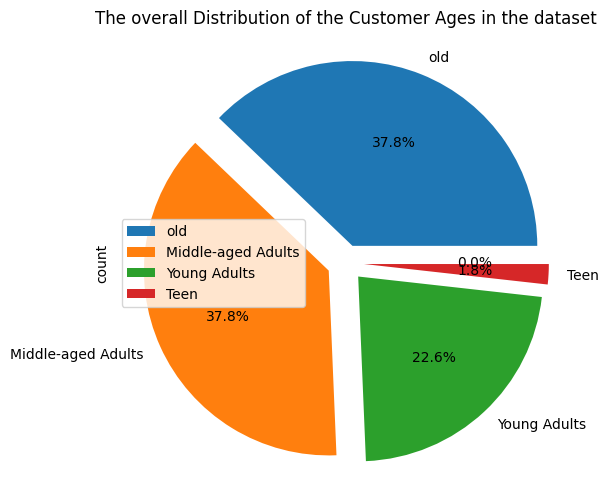

In [19]:
plt.figure(figsize = (20,6))
explode = [0.1]*len(age_data)
age_data.plot(kind = 'pie', explode = explode, autopct = '%1.1f%%')
plt.title("The overall Distribution of the Customer Ages in the dataset")
plt.legend()
plt.show()

#2.  The Average Purchase Amount vary across different product categories:

In [20]:
data.groupby('Category')['Purchase Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Accessories,1240.0,59.838710,23.301230,20.0,39.75,60.0,80.0,100.0
Clothing,1737.0,60.025331,23.792460,20.0,38.00,60.0,81.0,100.0
Footwear,599.0,60.255426,23.638439,20.0,39.00,60.0,81.0,100.0
Outerwear,324.0,57.172840,24.590033,20.0,34.00,54.5,80.0,100.0


In [21]:
print("The Average Purchase Amount vary across different product categories: ")
data.groupby('Category')['Purchase Amount (USD)'].mean()

The Average Purchase Amount vary across different product categories: 


,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


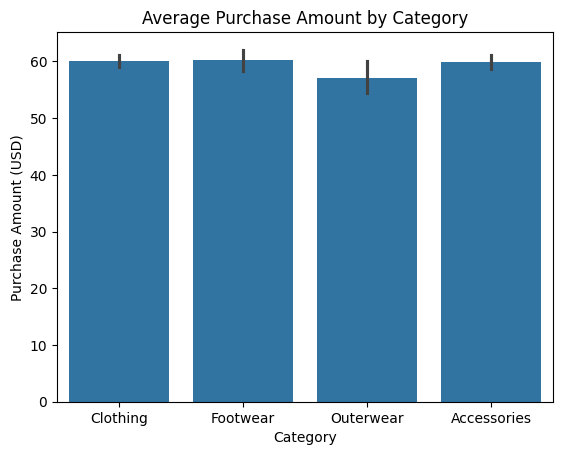

In [22]:
sns.barplot(x= data['Category'], y= data["Purchase Amount (USD)"])
plt.xlabel("Category")
plt.ylabel("Purchase Amount (USD)")
plt.title("Average Purchase Amount by Category")
plt.show()

# 3. The Avergae purchase of the products by each gender

Text(0.5, 1.0, 'The purchase of the products by each gender')

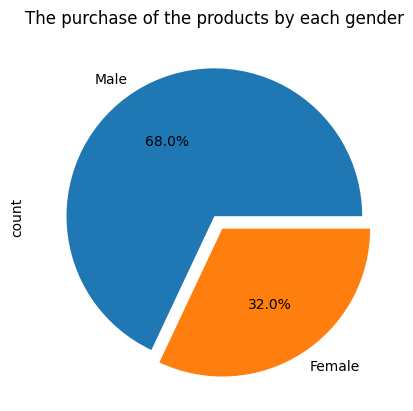

In [23]:
data['Gender'].value_counts().plot(kind = 'pie', explode = (0, 0.1), autopct = '%1.1f%%')
plt.title("The purchase of the products by each gender")

In [24]:
print("The Avergae purchase of the products by each gender: ")
data.groupby('Gender')['Purchase Amount (USD)'].mean()

The Avergae purchase of the products by each gender: 


,Purchase Amount (USD)
Gender,
Female,60.249199
Male,59.536199


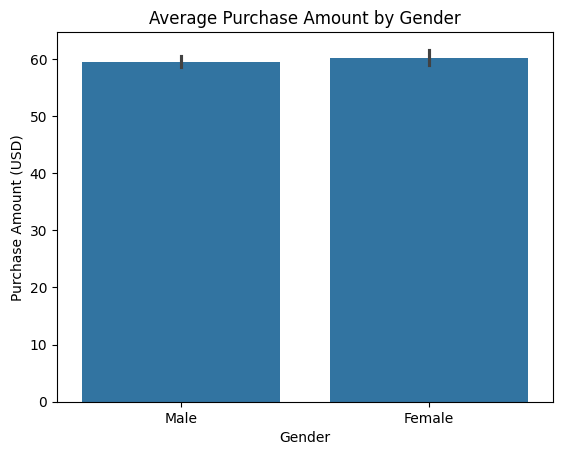

In [25]:
sns.barplot(x= data['Gender'], y= data["Purchase Amount (USD)"])
plt.xlabel("Gender")
plt.ylabel("Purchase Amount (USD)")
plt.title("Average Purchase Amount by Gender")
plt.show()

# 4. Most commonly purchased Items in each category

In [26]:
common_items = pd.DataFrame(data.groupby('Category')["Item Purchased"].value_counts())
common_items

count
Category    Item Purchased       
Accessories Jewelry           171
            Belt              161
            Sunglasses        161
            Scarf             157
            Hat               154
            Handbag           153
            Backpack          143
            Gloves            140
Clothing    Blouse            171
            Pants             171
            Shirt             169
            Dress             166
            Sweater           164
            Socks             159
            Skirt             158
            Shorts            157
            Hoodie            151
            T-shirt           147
            Jeans             124
Footwear    Sandals           160
            Shoes             150
            Sneakers          145
            Boots             144
Outerwear   Jacket            163
            Coat              161

Text(0.5, 1.0, 'Most Commonly Purchased Item Category')

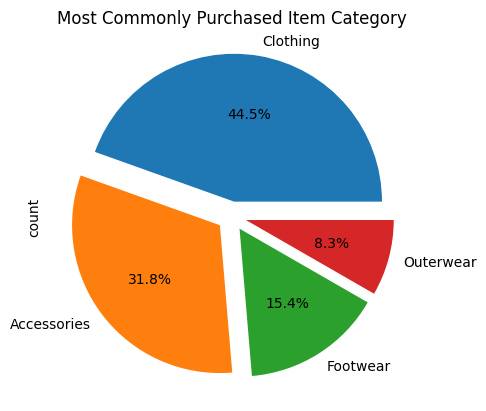

In [27]:
data['Category'].value_counts().plot(kind = 'pie', subplots = True,explode =[0.1]*4 ,autopct = '%1.1f%%')
plt.title("Most Commonly Purchased Item Category")

Text(0.5, 1.0, 'Most Commonly Purchased Accessories')

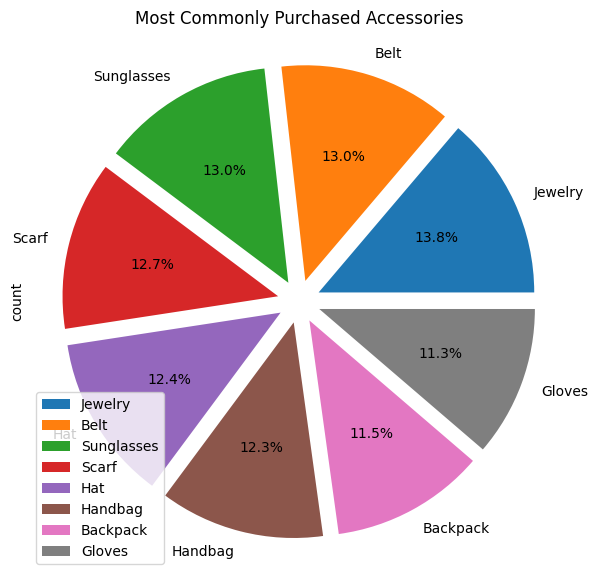

In [28]:
common_items.loc['Accessories'].plot(kind = 'pie', y = 'count', subplots = True,explode=[0.1]*8, figsize = (7,7), autopct = '%1.1f%%')
plt.title("Most Commonly Purchased Accessories")

Text(0.5, 1.0, 'Most Commonly Purchased Clothing')

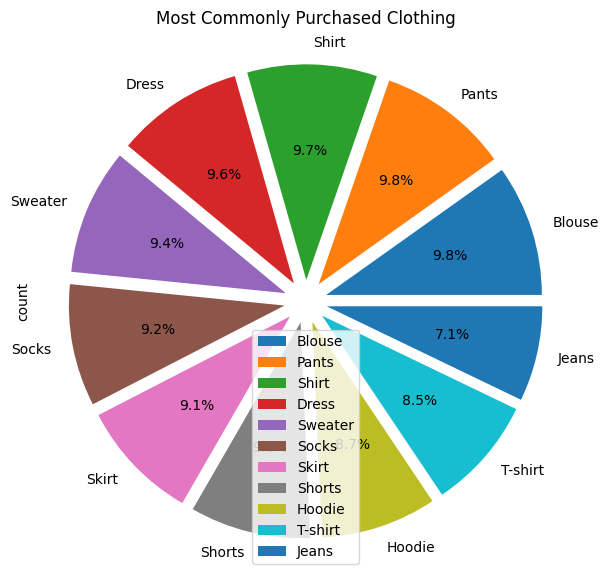

In [29]:
common_items.loc['Clothing'].plot(kind = 'pie', y = 'count', subplots = True, explode = [0.1]*11, figsize = (7,7), autopct = '%1.1f%%')
plt.title("Most Commonly Purchased Clothing")

Text(0.5, 1.0, 'Most Commonly Purchased Footwear')

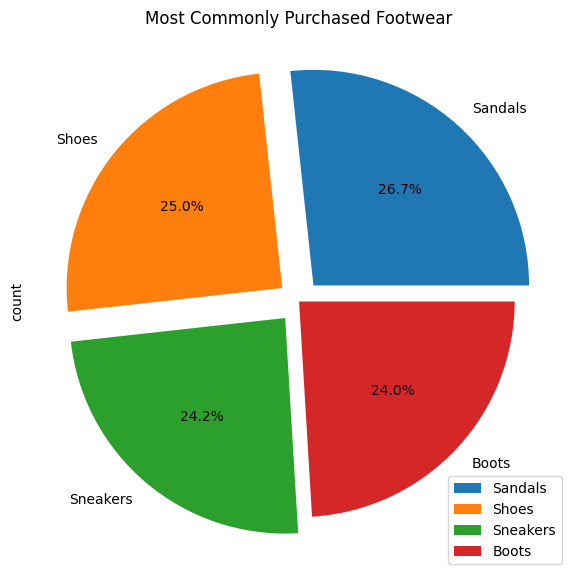

In [30]:
common_items.loc['Footwear'].plot(kind = 'pie', y = 'count', subplots = True, explode = (0.1,0.1,0.1,0), figsize = (7,7), autopct = '%1.1f%%')
plt.title("Most Commonly Purchased Footwear")

Text(0.5, 1.0, 'Most Commonly Purchased Outerwear')

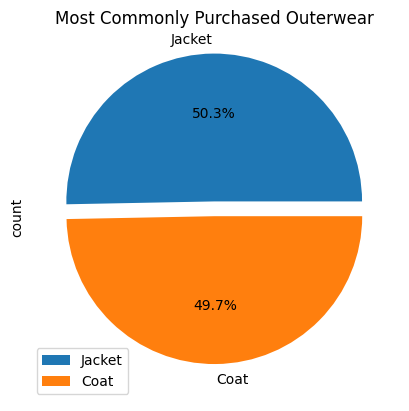

In [31]:
common_items.loc['Outerwear'].plot(kind = 'pie', y = 'count',explode = (0.1,0), subplots = True, autopct = '%1.1f%%')
plt.title("Most Commonly Purchased Outerwear")

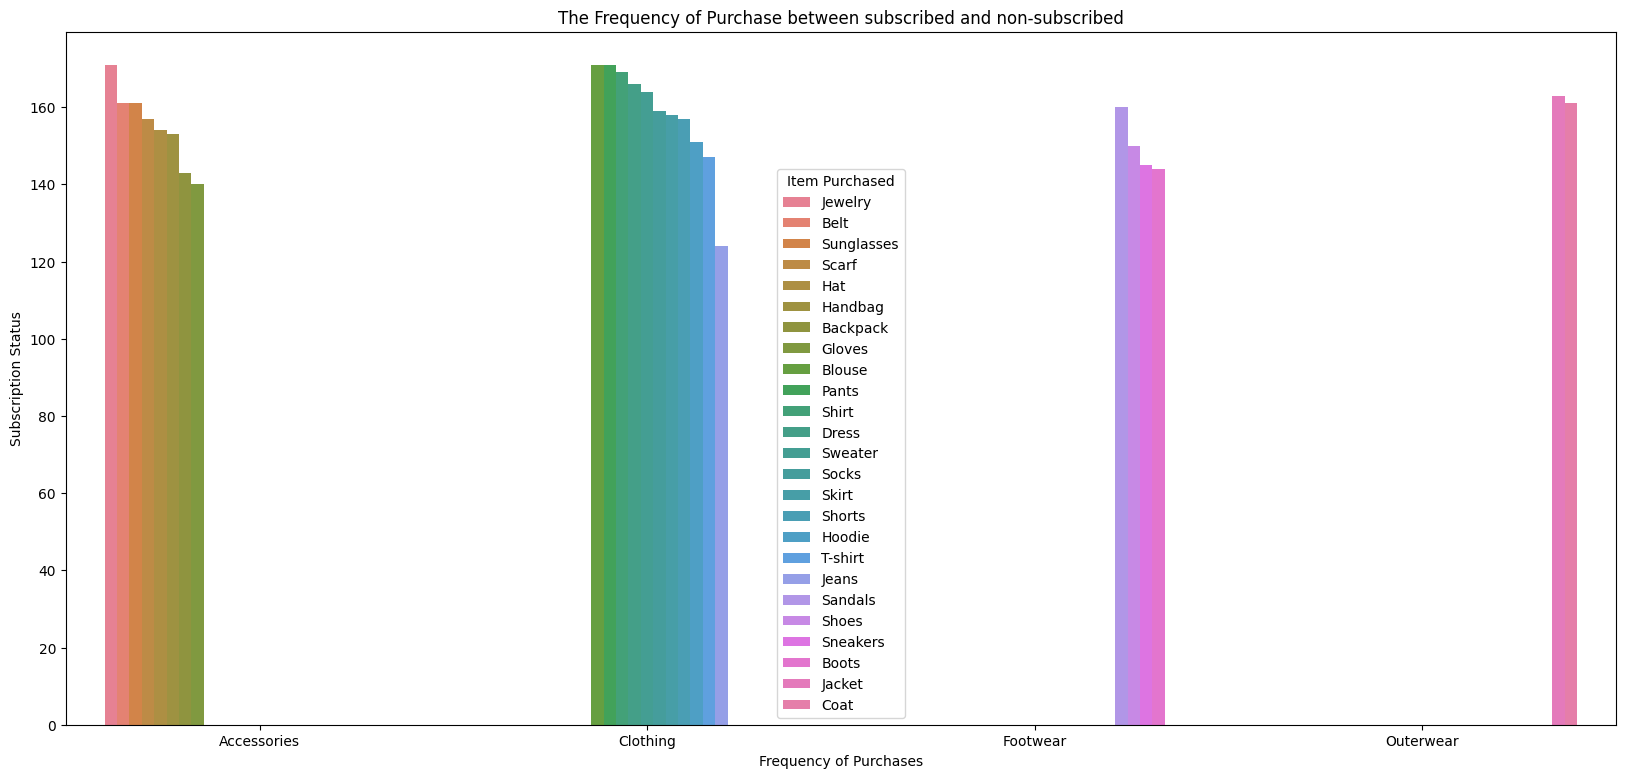

In [32]:
fig, ax = plt.subplots(figsize = (20,9))
sns.barplot(common_items, x = 'Category', y = 'count', hue = 'Item Purchased', ax = ax)
plt.xlabel("Frequency of Purchases")
plt.ylabel("Subscription Status")
plt.title("The Frequency of Purchase between subscribed and non-subscribed")
plt.show()

# 5. Season where the spending of the customer is significantly higher

In [33]:
season_purchased = data.groupby('Season')['Purchase Amount (USD)'].sum()
season_purchased

,Purchase Amount (USD)
Season,
Fall,60018
Spring,58679
Summer,55777
Winter,58607


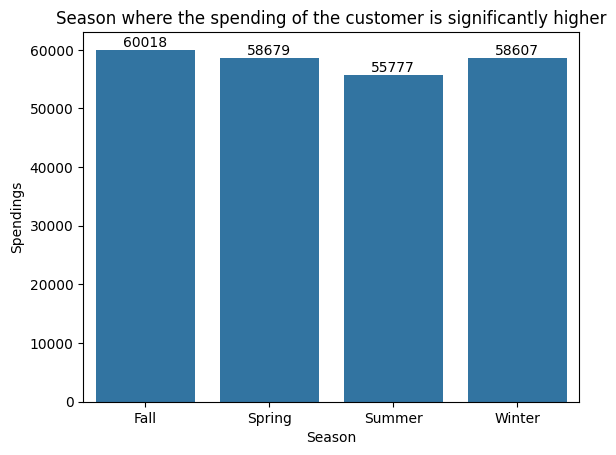

In [34]:
ax = sns.barplot(season_purchased)
ax.bar_label(ax.containers[0])
plt.xlabel("Season")
plt.ylabel("Spendings")
plt.title("Season where the spending of the customer is significantly higher")
plt.show()

# 6. Average rating given by the customers for each product category

In [35]:
average_rating_for_category = data.groupby('Category')['Review Rating'].mean()
average_rating_for_category

,Review Rating
Category,
Accessories,3.768629
Clothing,3.723143
Footwear,3.790651
Outerwear,3.746914


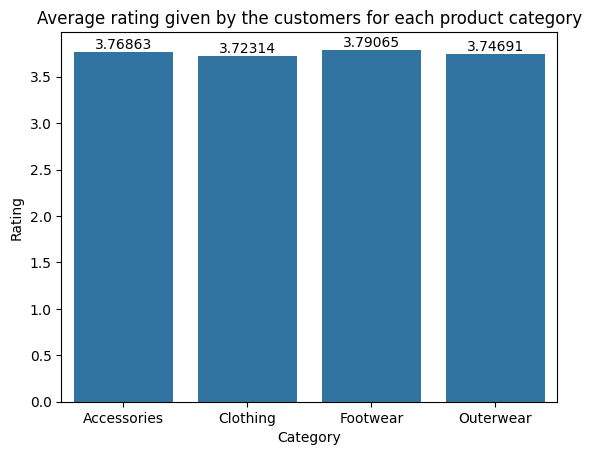

In [36]:
ax = sns.barplot(average_rating_for_category)
ax.bar_label(ax.containers[0])
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Average rating given by the customers for each product category")
plt.show()

# 7. The Notable Difference in purchase behavior between subscribed and non-subscribed

In [37]:
data['Subscription Status'].value_counts()

,count
Subscription Status,
No,2847
Yes,1053


In [38]:
purchase_behaviour_Frequency = pd.DataFrame(data.groupby('Subscription Status')['Frequency of Purchases'].value_counts())
purchase_behaviour_Frequency

count
Subscription Status Frequency of Purchases       
No                  Every 3 Months            430
                    Quarterly                 423
                    Annually                  412
                    Bi-Weekly                 407
                    Monthly                   404
                    Fortnightly               389
                    Weekly                    382
Yes                 Annually                  160
                    Weekly                    157
                    Every 3 Months            154
                    Fortnightly               153
                    Monthly                   149
                    Bi-Weekly                 140
                    Quarterly                 140

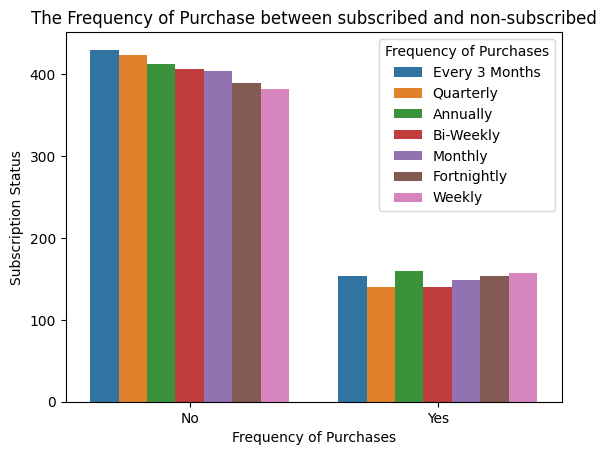

In [39]:
sns.barplot(purchase_behaviour_Frequency, x = 'Subscription Status', y = 'count', hue = 'Frequency of Purchases')
plt.xlabel("Frequency of Purchases")
plt.ylabel("Subscription Status")
plt.title("The Frequency of Purchase between subscribed and non-subscribed")
plt.show()

In [40]:
purchase_behaviour_Shipping = pd.DataFrame(data.groupby('Subscription Status')['Shipping Type'].value_counts())
purchase_behaviour_Shipping

count
Subscription Status Shipping Type        
No                  Free Shipping     498
                    Next Day Air      480
                    Standard          479
                    2-Day Shipping    474
                    Store Pickup      460
                    Express           456
Yes                 Express           190
                    Store Pickup      190
                    Free Shipping     177
                    Standard          175
                    Next Day Air      168
                    2-Day Shipping    153

Text(0.5, 1.0, 'The shipping type of the order between subscribed and non-subscribed')

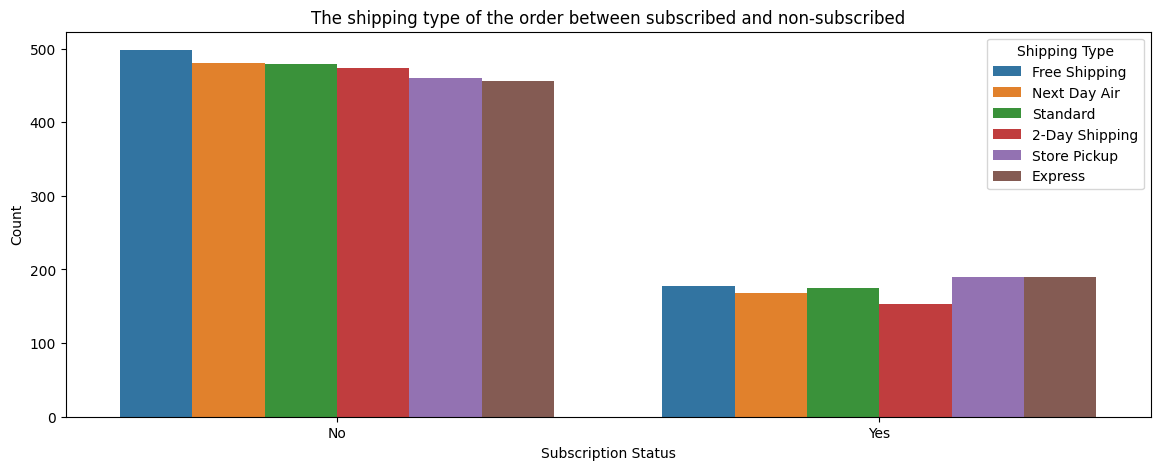

In [41]:
fig, ax = plt.subplots(figsize = (14,5))
sns.barplot(purchase_behaviour_Shipping, x= 'Subscription Status', y= 'count', hue = 'Shipping Type', ax = ax)
plt.xlabel("Subscription Status")
plt.ylabel("Count")
plt.title("The shipping type of the order between subscribed and non-subscribed")

In [42]:
purchase_behaviour_Category = pd.DataFrame(data.groupby('Subscription Status')['Category'].value_counts())
purchase_behaviour_Category

count
Subscription Status Category          
No                  Clothing      1280
                    Accessories    906
                    Footwear       428
                    Outerwear      233
Yes                 Clothing       457
                    Accessories    334
                    Footwear       171
                    Outerwear       91

Text(0.5, 1.0, 'The Category of the order between subscribed and non-subscribed')

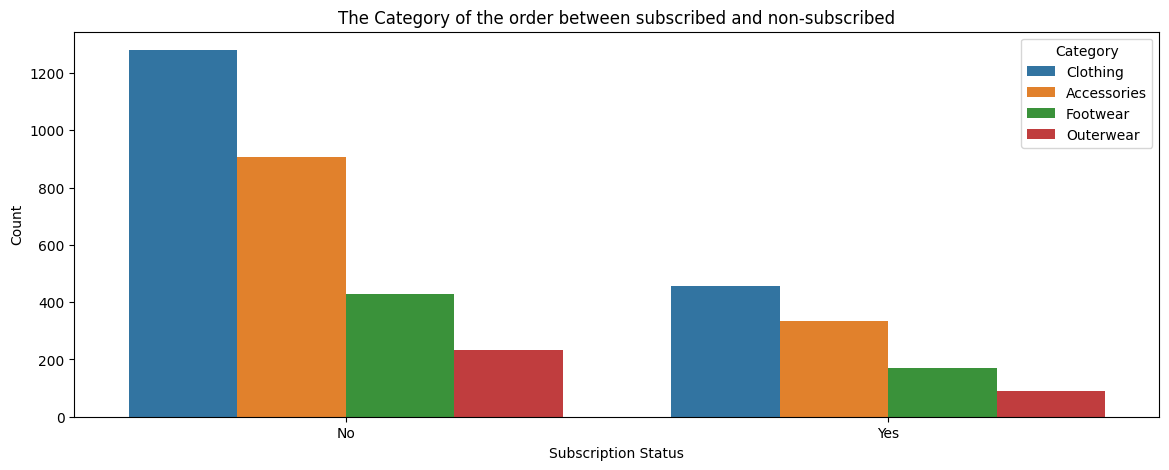

In [43]:
fig, ax = plt.subplots(figsize = (14,5))
sns.barplot(purchase_behaviour_Category, x= 'Subscription Status', y= 'count', hue = 'Category', ax = ax)
plt.xlabel("Subscription Status")
plt.ylabel("Count")
plt.title("The Category of the order between subscribed and non-subscribed")

In [44]:
purchase_behaviour_Rating = pd.DataFrame(data.groupby('Subscription Status')['Review_category'].value_counts())
purchase_behaviour_Rating

count
Subscription Status Review_category       
No                  Very Good         1163
                    Excellent         1066
                    Moderate           618
                    Bad                  0
                    Not Bad              0
Yes                 Very Good          427
                    Excellent          397
                    Moderate           229
                    Bad                  0
                    Not Bad              0

Text(0.5, 1.0, 'The Rating of the order between subscribed and non-subscribed')

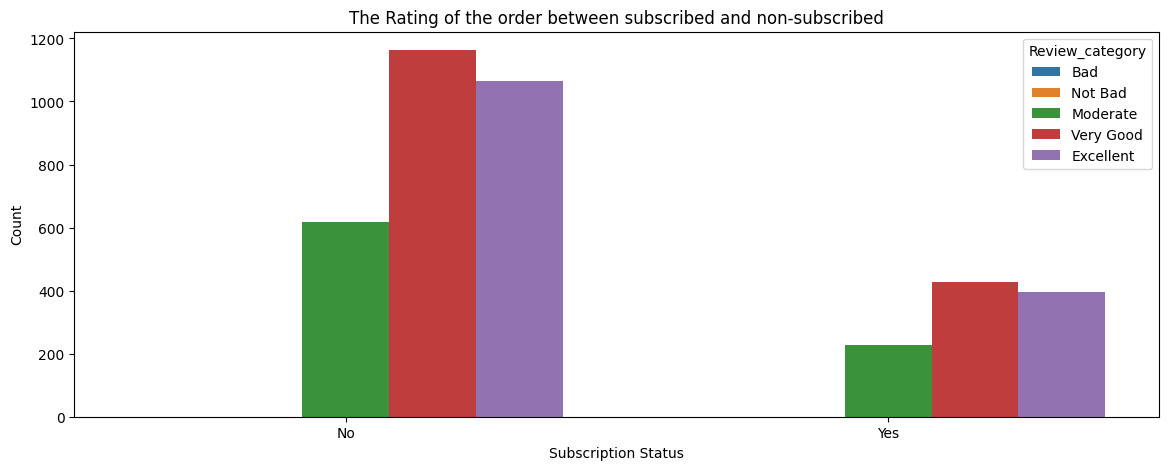

In [45]:
fig, ax = plt.subplots(figsize = (14,5))
sns.barplot(purchase_behaviour_Rating, x= 'Subscription Status', y= 'count', hue = 'Review_category', ax = ax)
plt.xlabel("Subscription Status")
plt.ylabel("Count")
plt.title("The Rating of the order between subscribed and non-subscribed")

# 8. The Most Popular Payment method among Customers

In [46]:
common_payment_method = pd.DataFrame(data['Payment Method'].value_counts())
common_payment_method

,count
Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


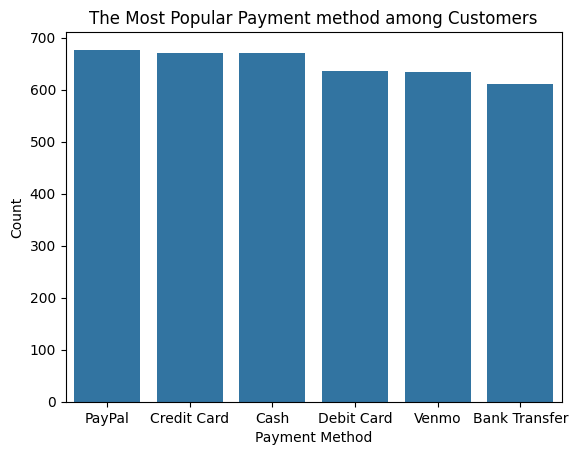

In [47]:
sns.barplot(common_payment_method, x = 'Payment Method', y = 'count')
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("The Most Popular Payment method among Customers")
plt.show()

# 9. Customers with promo code analysis


In [48]:
data['Promo Code Used'].value_counts()

,count
Promo Code Used,
No,2223
Yes,1677


In [49]:
customer_promo_code = pd.DataFrame(data.groupby('Promo Code Used')['Purchase Amount (USD)'].sum())
customer_promo_code

,Purchase Amount (USD)
Promo Code Used,
No,133670
Yes,99411


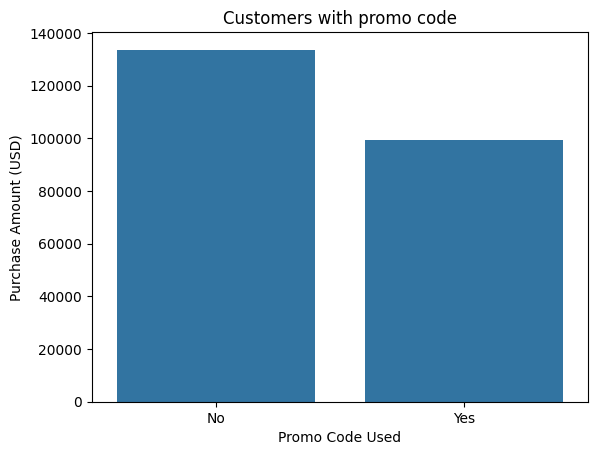

In [50]:
sns.barplot(customer_promo_code, x = 'Promo Code Used', y = 'Purchase Amount (USD)')
plt.xlabel("Promo Code Used")
plt.ylabel("Purchase Amount (USD)")
plt.title("Customers with promo code")
plt.show()

# 10. Frequency of purchase vary across different Age groups

In [51]:
frequency_age = pd.DataFrame(data.groupby("Age Category")['Frequency of Purchases'].value_counts())
frequency_age

<ipython-input-51-69e45f151449>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_age = pd.DataFrame(data.groupby("Age Category")['Frequency of Purchases'].value_counts())


count
Age Category       Frequency of Purchases       
Child              Annually                    0
                   Bi-Weekly                   0
                   Every 3 Months              0
                   Fortnightly                 0
                   Monthly                     0
                   Quarterly                   0
                   Weekly                      0
Teen               Every 3 Months             12
                   Quarterly                  11
                   Annually                   10
                   Bi-Weekly                  10
                   Fortnightly                10
                   Weekly                      9
                   Monthly                     7
Young Adults       Bi-Weekly                 148
                   Quarterly                 134
                   Every 3 Months            133
                   Fortnightly               127
                   Monthly                   116
                   Annually                  114
                   Weekly                    108
Middle-aged Adults Every 3 Months            232
                   Monthly                   225
                   Annually                  218
                   Weekly                    215
                   Fortnightly               208
                   Bi-Weekly                 190
                   Quarterly                 187
old                Quarterly                 231
                   Annually                  230
                   Every 3 Months            207
                   Weekly                    207
                   Monthly                   205
                   Bi-Weekly                 199
                   Fortnightly               197

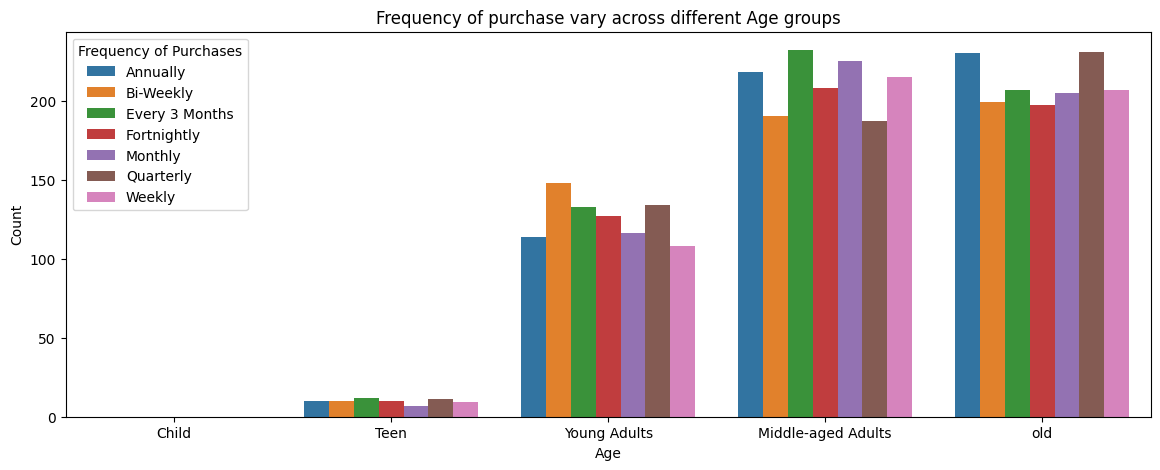

In [52]:
fig, ax = plt.subplots(figsize = (14,5))
sns.barplot(frequency_age, x = 'Age Category', y = 'count', hue = 'Frequency of Purchases', ax = ax)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Frequency of purchase vary across different Age groups")
plt.show()

# 11. Cor-relation between the Size of the product and the Purchase

In [53]:
Int_data = data[['Age','Purchase Amount (USD)', 'Review Rating',	'Previous Purchases']]
correlation = Int_data.corr()
correlation

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


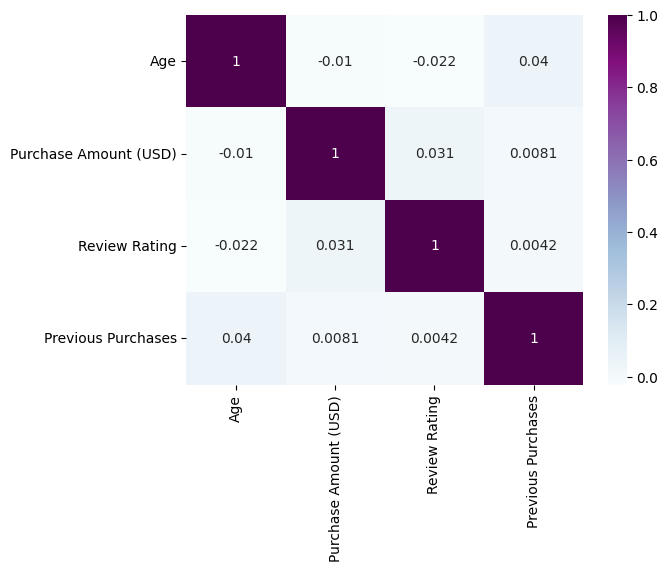

In [54]:
sns.heatmap(correlation, annot = True, cmap = 'BuPu')
plt.show()

# 12.Shipping type preferred by customers for different product categories

In [55]:
shipping_product = pd.DataFrame(data.groupby('Category')['Shipping Type'].value_counts())
shipping_product

count
Category    Shipping Type        
Accessories Store Pickup      217
            Next Day Air      211
            Standard          208
            2-Day Shipping    206
            Express           203
            Free Shipping     195
Clothing    Standard          297
            Free Shipping     294
            Next Day Air      293
            Express           290
            Store Pickup      282
            2-Day Shipping    281
Footwear    Free Shipping     122
            Standard          100
            Store Pickup       98
            Express            96
            Next Day Air       93
            2-Day Shipping     90
Outerwear   Free Shipping      64
            Express            57
            Store Pickup       53
            Next Day Air       51
            2-Day Shipping     50
            Standard           49

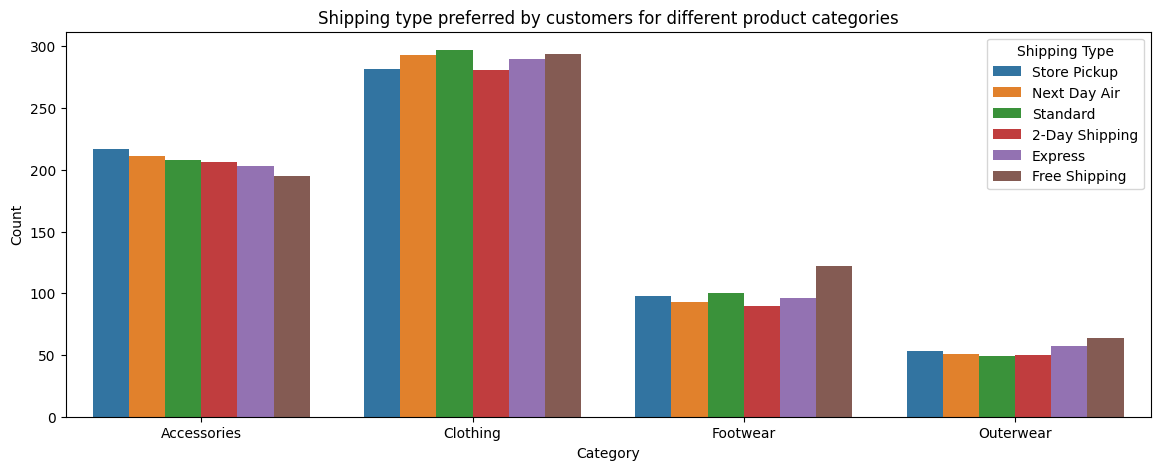

In [56]:
plt.figure(figsize = (14,5))
sns.barplot(shipping_product, x = 'Category', y = 'count', hue = 'Shipping Type')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Shipping type preferred by customers for different product categories")
plt.show()

# 13. Discount affects the purchase behaviour of the customer

In [57]:
data['Discount Applied'].value_counts()

,count
Discount Applied,
No,2223
Yes,1677


In [58]:
purchase_discount = pd.DataFrame(data.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index())
purchase_discount

,Discount Applied,Purchase Amount (USD)
0,No,133670
1,Yes,99411


In [59]:
px.histogram(purchase_discount , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

In [60]:
data.groupby(["Gender", 'Discount Applied'])['Purchase Amount (USD)'].sum().reset_index()

,Gender,Discount Applied,Purchase Amount (USD)
0,Female,No,75191
1,Male,No,58479
2,Male,Yes,99411


In [61]:
fig = px.sunburst(data , path = ['Gender' , 'Discount Applied'], values='Purchase Amount (USD)' , color= 'Gender')
fig.show()

# 14. Colour that is popular among the Customer

In [71]:
color_popularity = pd.DataFrame(data['Color'].value_counts())
color_popularity

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169
Black,167
Cyan,166
Violet,166
Gray,159


In [78]:
plt.bar(x = color_popularity['Color'] , y = color_popularity['count'])
plt.show()

KeyError: 'Color'

In [63]:
colour_popularity = pd.DataFrame(data.groupby('Color')['Gender'].value_counts())
colour_popularity

count
Color     Gender       
Beige     Male      107
          Female     40
Black     Male      113
          Female     54
Blue      Male      100
          Female     52
Brown     Male       95
          Female     46
Charcoal  Male      103
          Female     50
Cyan      Male      119
          Female     47
Gold      Male       97
          Female     41
Gray      Male      106
          Female     53
Green     Male      113
          Female     56
Indigo    Male      102
          Female     45
Lavender  Male       99
          Female     48
Magenta   Male       95
          Female     57
Maroon    Male      104
          Female     54
Olive     Male      118
          Female     59
Orange    Male      103
          Female     51
Peach     Male      101
          Female     48
Pink      Male       95
          Female     58
Purple    Male      109
          Female     42
Red       Male      104
          Female     44
Silver    Male      121
          Female     52
Teal      Male      119
          Female     53
Turquoise Male      105
          Female     40
Violet    Male      113
          Female     53
White     Male       97
          Female     45
Yellow    Male      114
          Female     60